In [1]:
#allow for autoreload of packages
%load_ext autoreload
%autoreload 2

import fresh as fresh
import recycle as recycle

from qiskit_ibm_runtime import QiskitRuntimeService 
from qiskit_ibm_runtime.fake_provider import FakeTorino
# 

# Retrieve backend

In [33]:

service = QiskitRuntimeService()
backend = service.least_busy(
    simulator=False, operational=True, min_num_qubits=100
)
#backend = FakeTorino()
print(f"Selected backend: {backend.name}")
#pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
 

Selected backend: ibm_marrakesh


# FRESH 

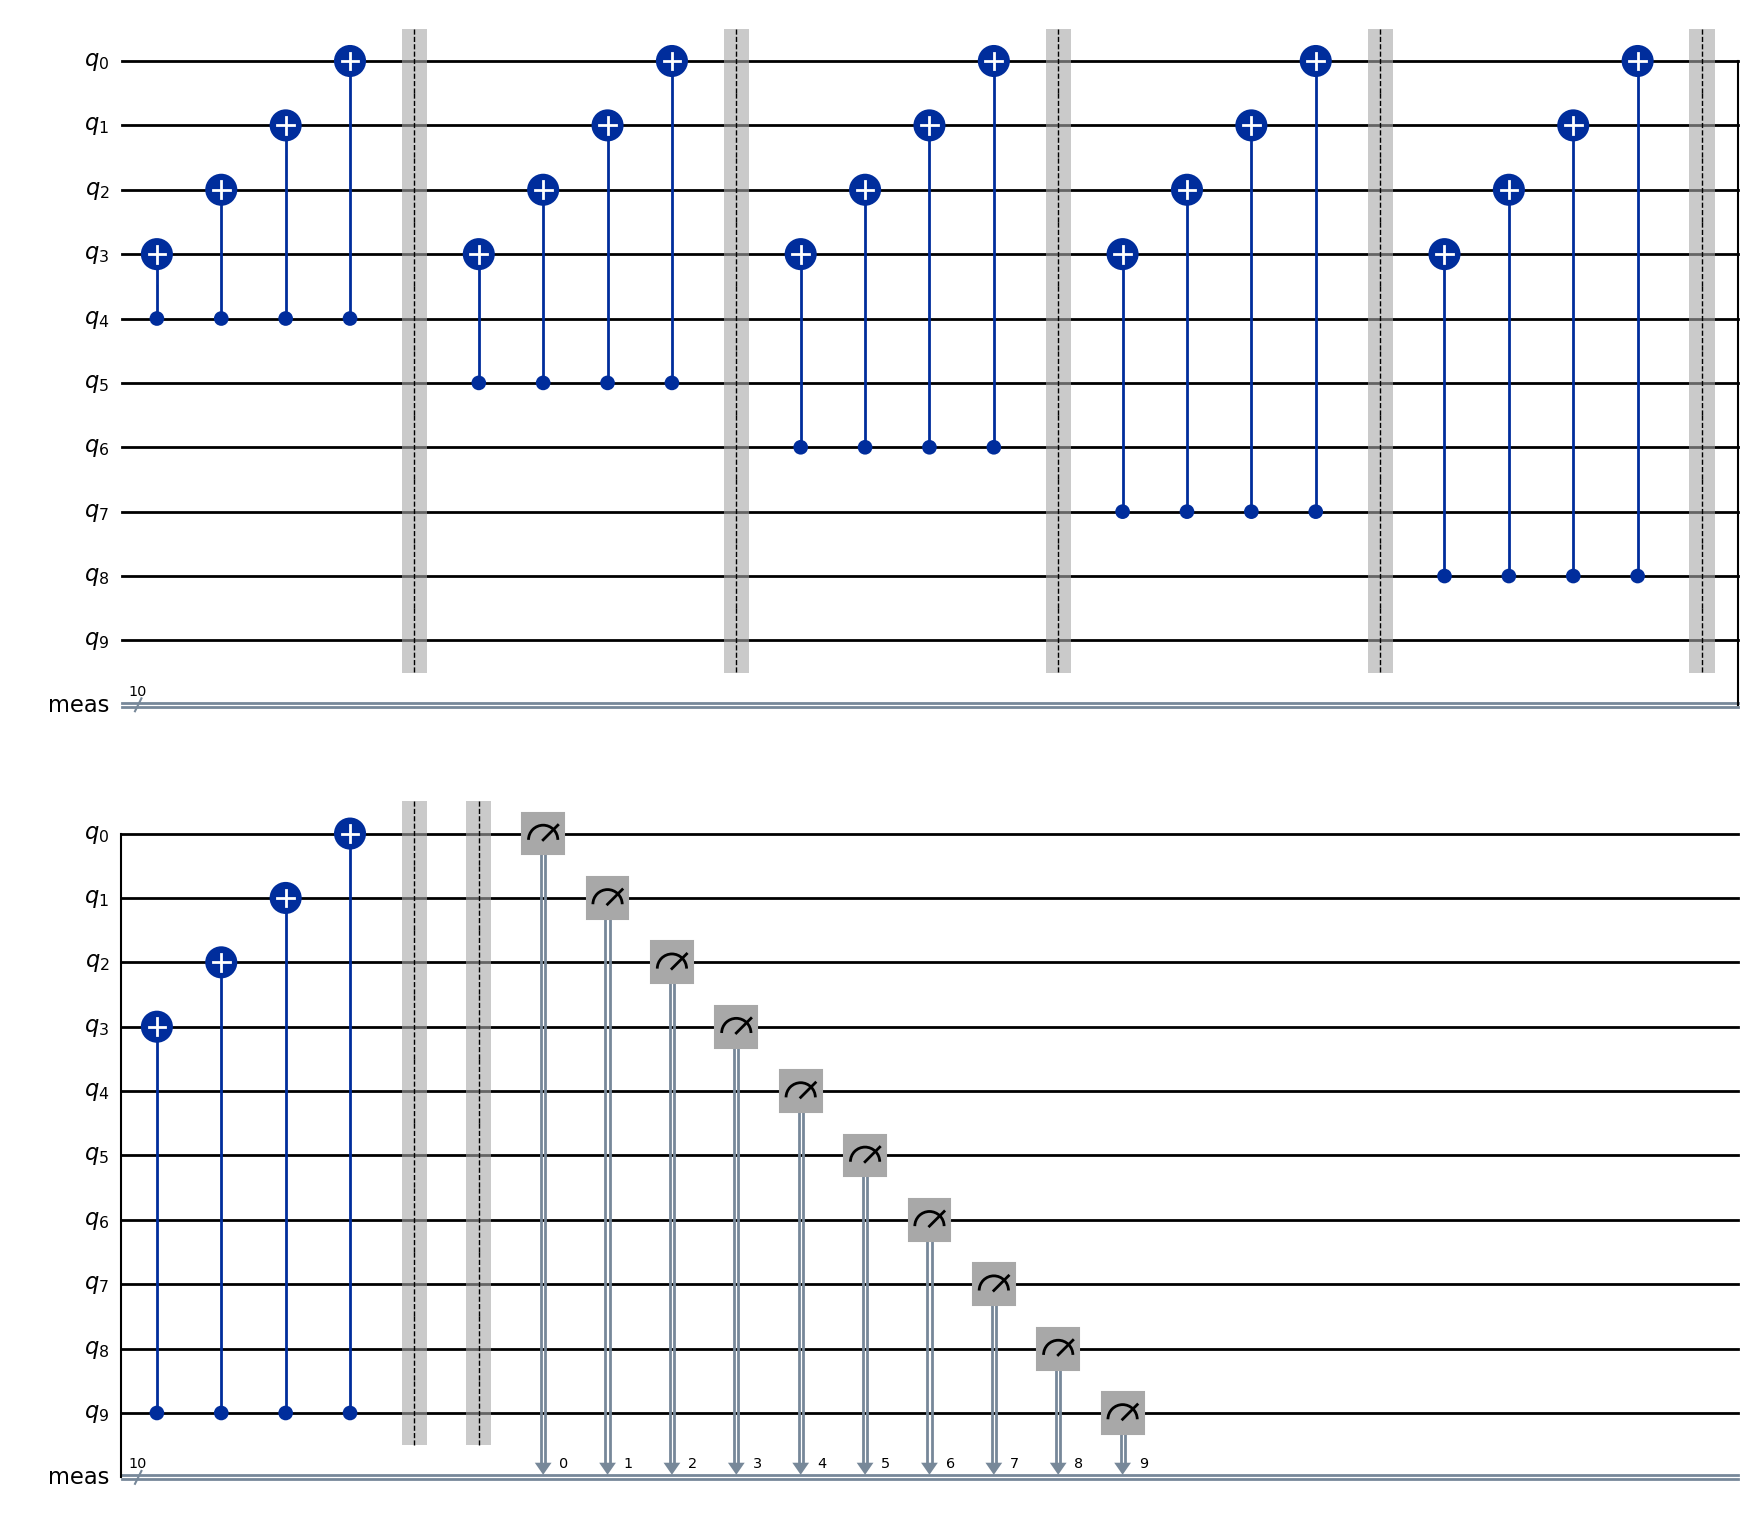

In [3]:
n=6
fresh_circ = fresh.generate_circuit(n=n)
fresh_circ.draw("mpl")

In [36]:
shots = 1000
iters = 7
results_0fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=0)

KeyboardInterrupt: 

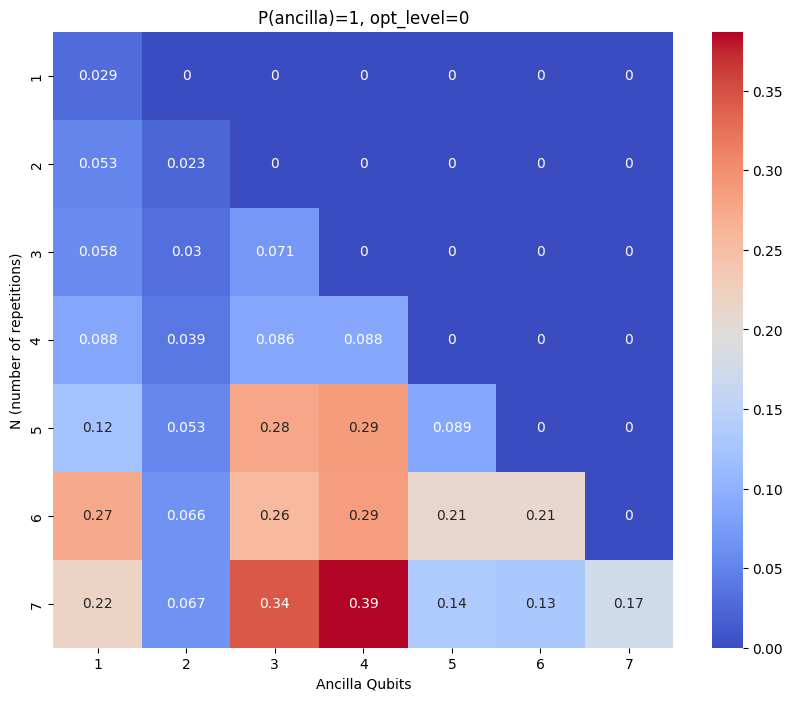

0.0208


In [ ]:
fresh.plot_heatmap(results_0fr, 0)

plag_0fr = fresh.plag_error_rate(results_0fr, iters)
print(plag_0fr)

In [9]:
opt_level = 1
results_1fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=opt_level)

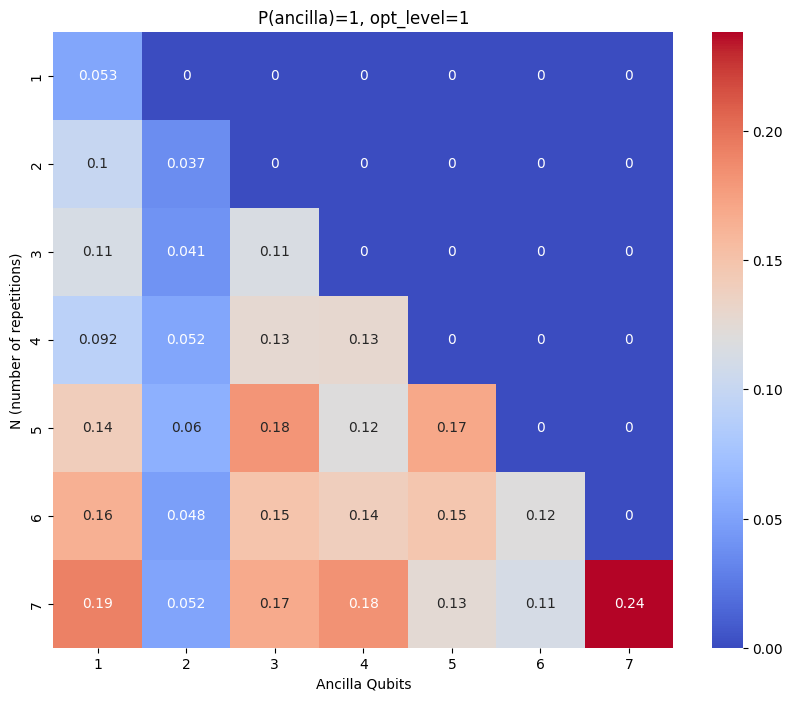

0.0265


In [11]:
fresh.plot_heatmap(results_1fr, opt_level)


plag_1fr = fresh.plag_error_rate(results_1fr, iters)
print(plag_1fr)

In [29]:
opt_level = 2
results_2fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=opt_level)

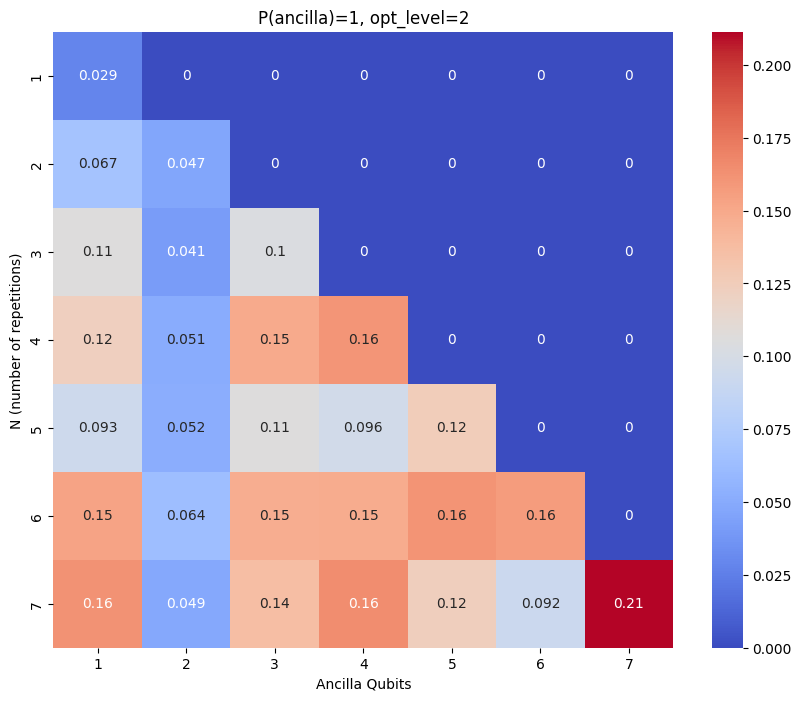

0.0261


In [30]:
fresh.plot_heatmap(results_2fr, opt_level)

plag_2fr = fresh.plag_error_rate(results_2fr, iters)
print(plag_2fr)

In [31]:
opt_level = 3
results_3fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=opt_level)

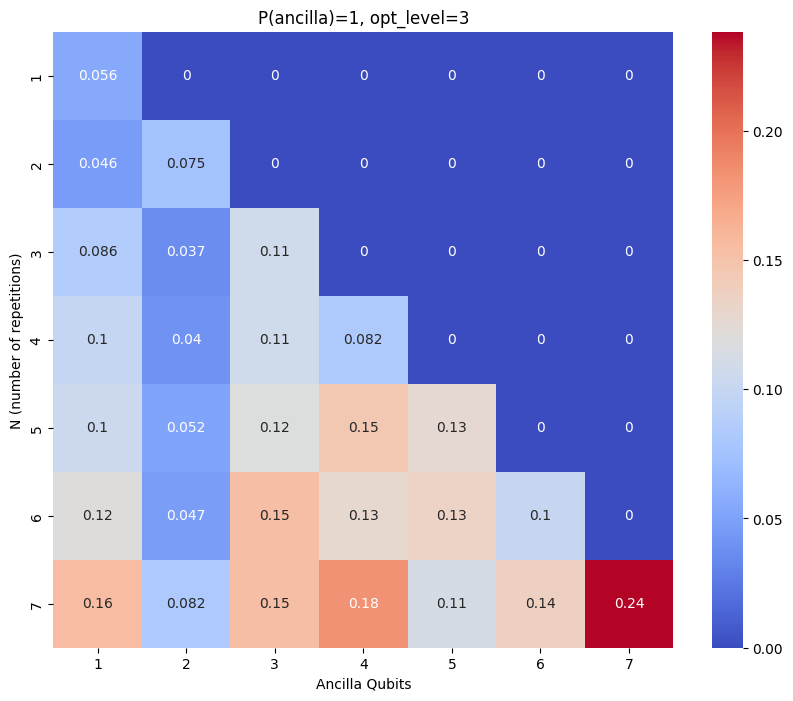

0.0261


In [32]:
fresh.plot_heatmap(results_3fr, opt_level)

plag_3fr = fresh.plag_error_rate(results_3fr, iters)
print(plag_3fr)


# RECYCLE

In [18]:
shots = 10000
n = 7 
results_0re = recycle.get_ancilla_probabilities(iters=n, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=0)
print(results_0re)

[0.046, 0.0588, 0.0898, 0.1085, 0.126, 0.1726, 0.1529]


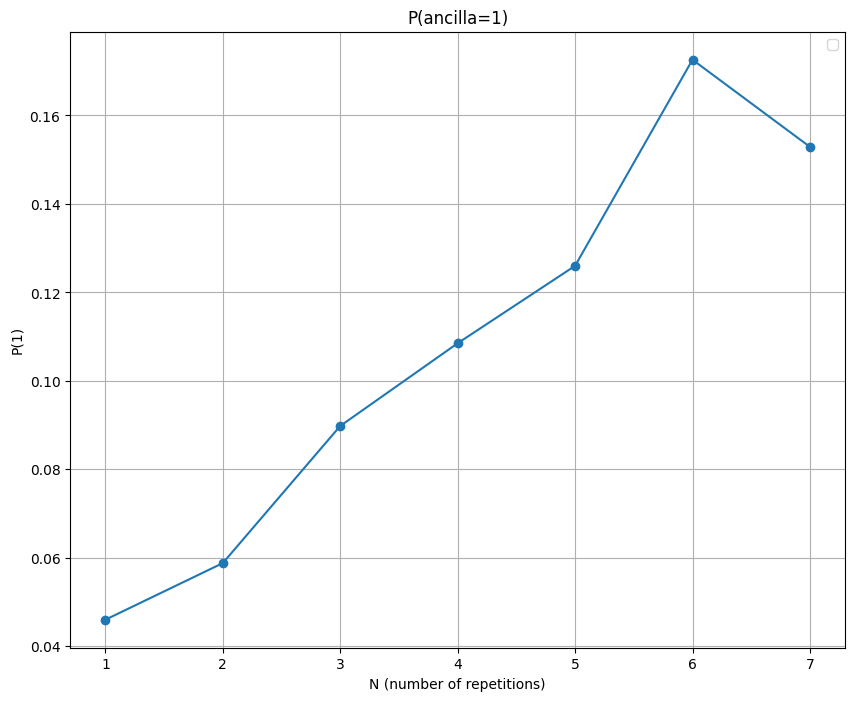

In [24]:
recycle.plot(results_0re)


In [22]:
corr = recycle.corr_err(results_0fr, results_0re, iters)
print(corr)

-0.1399
-0.15005
-0.15379444444444443
-0.15669444444444441
-0.1609064444444444
-0.16708977777777775
-0.02386996825396825


In [23]:
plag_recycle = recycle.plag_error_rate(corr,results_0re, iters)
print(plag_recycle)

0.0357


In [25]:
results_1re = recycle.get_ancilla_probabilities(iters=n, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=1)
print(results_1re)



[0.0148, 0.0243, 0.0361, 0.0323, 0.0341, 0.0428, 0.0512]


/u/14/doh6/data/Documents/qt-native-gate-optimization/recycle.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.title('P(ancilla=1)')


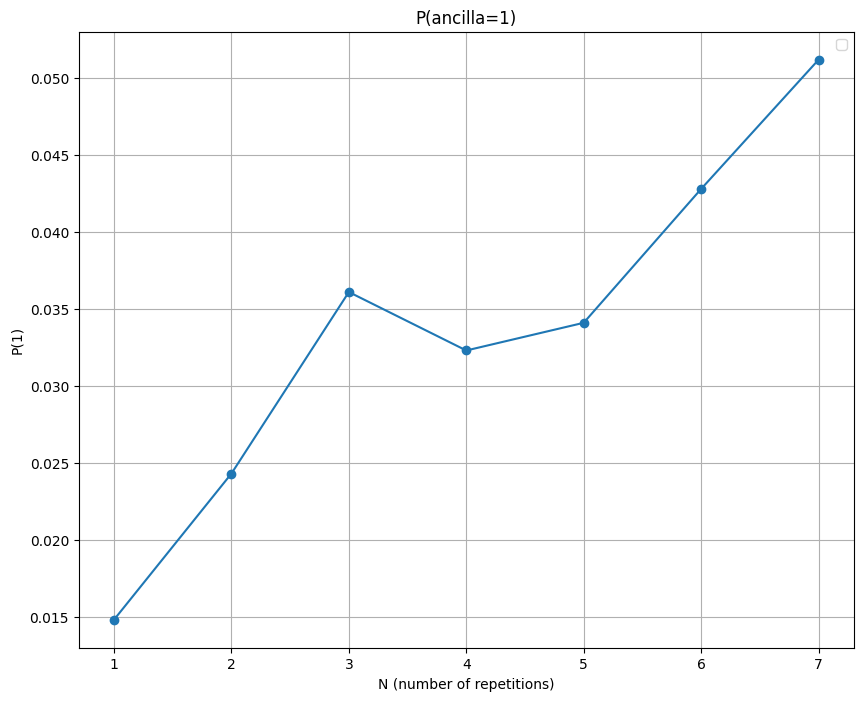

In [26]:
recycle.plot(results_1re)


In [28]:
corr = recycle.corr_err(results_1fr, results_1re, iters)
print(corr)


plag_recycle = recycle.plag_error_rate(corr,results_1re, iters)
print(plag_recycle)

-0.0127
-0.03232499999999999
-0.042969444444444435
-0.05145069444444444
-0.05451869444444444
-0.05971869444444444
-0.008531242063492064
0.0125
